In [5]:
from segment_anything import SamAutomaticMaskGenerator, sam_model_registry
import cv2
sam = sam_model_registry["vit_h"](checkpoint="localfiles\checkpoints\sam_vit_h_4b8939.pth")
mask_generator = SamAutomaticMaskGenerator(sam)


In [6]:
image = cv2.imread('localfiles/colorpiramidstexture.jpg')
masks = mask_generator.generate(image)

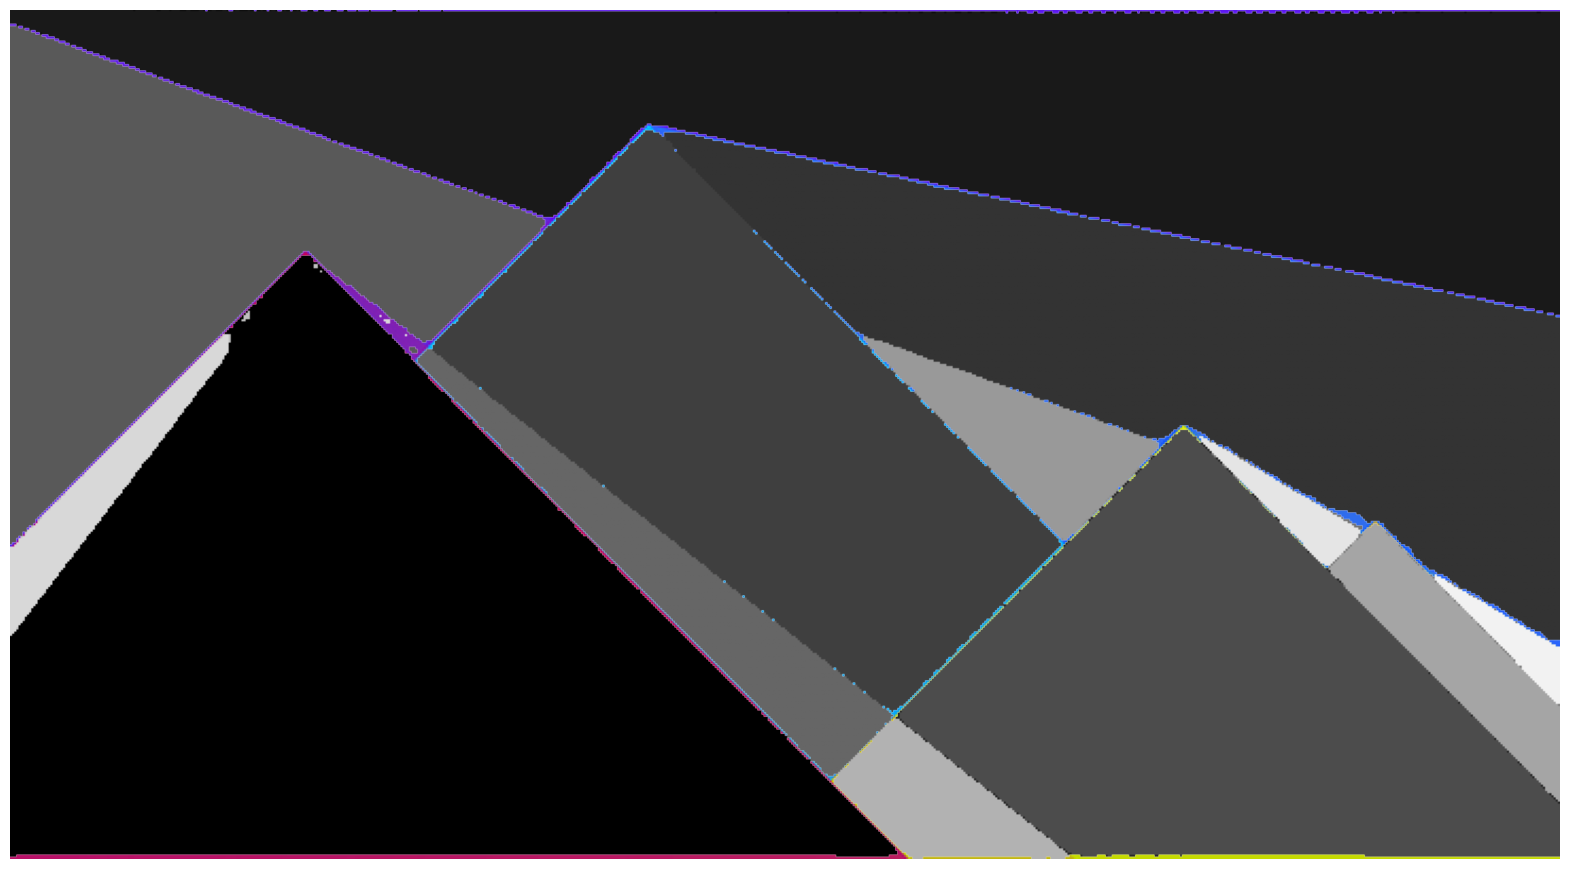

In [10]:
from matplotlib import pyplot as plt
import numpy as np

def show_anns(anns):
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)

    img = np.ones((sorted_anns[0]['segmentation'].shape[0], sorted_anns[0]['segmentation'].shape[1], 4))
    img[:,:,3] = 0
    nr = len(sorted_anns)
    i = 0
    for ann in sorted_anns:
        m = ann['segmentation']
        color_mask = np.concatenate([np.ones(3) / nr * i, [1]])
        img[m] = color_mask
        i+=1
    ax.imshow(img)

plt.figure(figsize=(20,20))
plt.imshow(image)
show_anns(masks)
plt.axis('off')
plt.show() 